In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [359]:
df=pd.read_csv("data/departures/departures.csv",sep='\t')
df1=pd.read_csv("data/arrivals/arrivals.csv",sep='\t')
df = pd.concat([df,df1], axis=0, sort=False, ignore_index=True)
df.index = [x for x in range(1, len(df.values)+1)]

In [360]:
df["diff"]= df["flight_arrival_scheduled"] - df["flight_arrival_real"]

In [361]:
df['Label']=0
def labelling(raw):
    if(raw >= 0):
        return "On_time"
    else:
        return "Delayed/Cancelled"

df['Label']=df['diff'].apply(labelling)

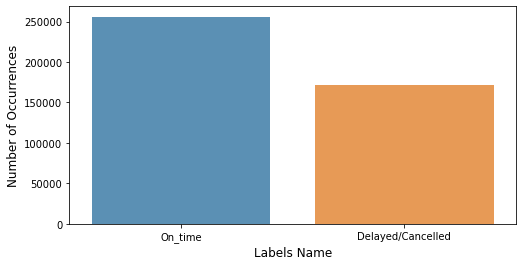

In [362]:
cnt_srs = df['Label'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Labels Name', fontsize=12)
plt.show()

Data is nearly balanced

In [363]:
# Let us get some basic stats #
print("Total Number of records : ", df.shape[0])
print("Number of uniques airline_name : ", len(df.airline_name.unique()))
print("Number of uniques flight_origin_code_iata : ", len(df.flight_origin_code_iata.unique()))
print("Number of uniques flight_destination_code_iata : ", len(df.flight_destination_code_iata.unique()))
print("Number of uniques flight_origin_name : ", len(df.flight_origin_name.unique()))
print("Number of uniques aircraft_model_code : ", len(df.aircraft_model_code.unique()))

Total Number of records :  427628
Number of uniques airline_name :  900
Number of uniques flight_origin_code_iata :  1007
Number of uniques flight_destination_code_iata :  973
Number of uniques flight_origin_name :  1006
Number of uniques aircraft_model_code :  301


In [364]:
df['ARRIVAL_DELAY']=df['flight_arrival_scheduled'] - df['flight_arrival_real']
df['ARRIVAL_DELAY']=df['ARRIVAL_DELAY'].apply(lambda x : np.absolute(x) if(x < 0) else 0 )

df['DEPARTURE_DELAY']=df['flight_departure_scheduled'] - df['flight_departure_real']
df['DEPARTURE_DELAY']=df['DEPARTURE_DELAY'].apply(lambda x : np.absolute(x) if(x < 0) else 0 )

#Delay at airport
df['DELAY']=df['DEPARTURE_DELAY'] - df['ARRIVAL_DELAY']


In [365]:
df=df[['mode', 'aircraft_model_code','airline_name', 'flight_origin_code_iata','flight_destination_code_iata', 'flight_departure_scheduled','flight_departure_real', 'flight_arrival_scheduled','flight_arrival_real','flight_duaration','ARRIVAL_DELAY','DEPARTURE_DELAY','DELAY','Label']]


In [366]:
df.isnull().sum(axis=0)

mode                                 0
aircraft_model_code                217
airline_name                         0
flight_origin_code_iata              0
flight_destination_code_iata         0
flight_departure_scheduled           0
flight_departure_real            20345
flight_arrival_scheduled             0
flight_arrival_real              32340
flight_duaration                158208
ARRIVAL_DELAY                        0
DEPARTURE_DELAY                      0
DELAY                                0
Label                                0
dtype: int64

In [367]:
df['aircraft_model_code'].fillna("Others", inplace=True)
df['flight_departure_real'].fillna(99999999999, inplace=True)
df['flight_arrival_real'].fillna(99999999999, inplace=True)
df["status"] = df["mode"]
df.drop('mode', axis = 1, inplace = True)


In [368]:
df


,aircraft_model_code,airline_name,flight_origin_code_iata,flight_destination_code_iata,flight_departure_scheduled,flight_departure_real,flight_arrival_scheduled,flight_arrival_real,flight_duaration,ARRIVAL_DELAY,DEPARTURE_DELAY,DELAY,Label,status
1,B788,Japan Airlines,HND,LHR,1558284900,1.558287e+09,1558329900,1.558329e+09,41940.0,0.0,2166.0,2166.0,On_time,arrivals
2,A333,South African Airways,JNB,LHR,1558288800,1.558290e+09,1558329900,1.558329e+09,39720.0,0.0,914.0,914.0,On_time,arrivals
3,A388,Qantas,SIN,LHR,1558281300,1.558286e+09,1558329900,1.558333e+09,46860.0,2893.0,4651.0,1758.0,Delayed/Cancelled,arrivals
4,B788,Royal Brunei Airlines,BWN,LHR,1558277700,1.558278e+09,1558329900,1.558329e+09,51120.0,0.0,326.0,326.0,On_time,arrivals
5,A333,Virgin Atlantic,JFK,LHR,1558303200,1.558306e+09,1558329900,1.558329e+09,23220.0,0.0,2894.0,2894.0,On_time,arrivals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427624,B738,TUI,LGW,IBZ,1559759700,1.559761e+09,1559768400,1.559769e+09,7800.0,435.0,1362.0,927.0,Delayed/Cancelled,arrivals
427625,B752,TUI,MAN,IBZ,1559758800,1.559760e+09,1559768400,1.559769e+09,8940.0,254.0,936.0,682.0,Delayed/Cancelled,arrivals
427626,A320,Vueling,BCN,IBZ,1559764500,1.559766e+09,1559768100,1.559768e+09,2280.0,274.0,1576.0,1302.0,Delayed/Cancelled,arrivals
427627,A320,easyJet,LGW,IBZ,1559759400,1.559760e+09,1559768100,1.559768e+09,7860.0,103.0,930.0,827.0,Delayed/Cancelled,arrivals


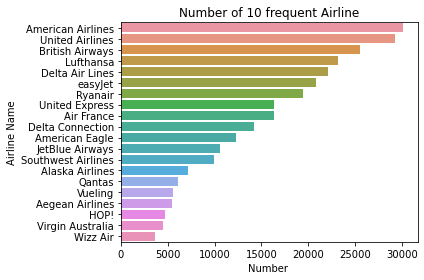

In [369]:
def group_and_count(df, groupby_column, with_pct=False, with_avg=False):
    result = df.groupby(groupby_column).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
    #print(result[:200])
    if with_pct:
        result['count_pct'] = result['count'] / result['count'].sum()
    if with_avg:
        result['count_avg'] = result['count'].mean()
    return result

sns.barplot(data=group_and_count(df, 'airline_name')[:20], y='airline_name', x='count')
plt.xlabel('Number ')
plt.ylabel('Airline Name')
plt.title('Number of 10 frequent Airline')
plt.tight_layout()



In [370]:
#keeping those airline whose value is greater that 500

airline_name_cts = df.groupby("airline_name").airline_name.count()
airline = airline_name_cts[airline_name_cts > 500]

In [371]:
def final_list(raw):
    if raw in airline:
        return raw
    else :
        return 'Other'
df['airline_name'] = df.airline_name.apply(final_list)

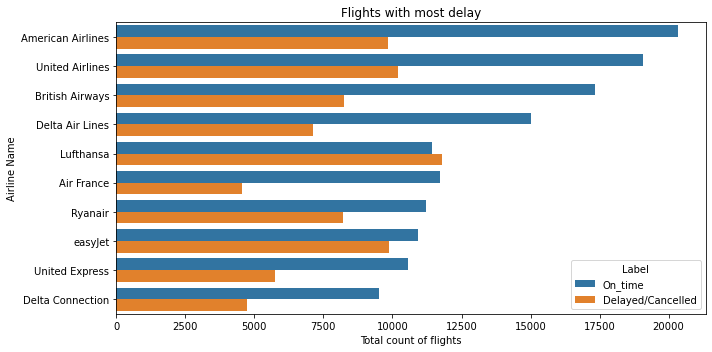

In [372]:
parties_of_interest = ['American Airlines','United Airlines','British Airways','Lufthansa','Delta Air Lines','easyJet','Ryanair','Air France','United Express','Delta Connection']
truhometer_labels = ['On_time', 'Delayed/Cancelled']

plt.figure(figsize=(10, 5))
sns.barplot(data=group_and_count(df.loc[df.airline_name.isin(parties_of_interest), :], ['airline_name', 'Label']), y='airline_name', x='count', hue='Label', hue_order=truhometer_labels)
plt.xlabel('Total count of flights')
plt.ylabel('Airline Name')
plt.title('Flights with most delay')
plt.tight_layout()


Lufthansa nd EasyJet are most probable for cancellation

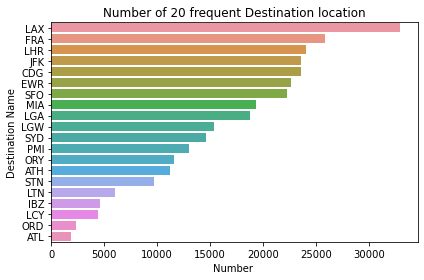

In [373]:
sns.barplot(data=group_and_count(df, 'flight_destination_code_iata')[:20], y='flight_destination_code_iata', x='count')
plt.xlabel('Number ')
plt.ylabel('Destination Name')
plt.title('Number of 20 frequent Destination location')
plt.tight_layout()

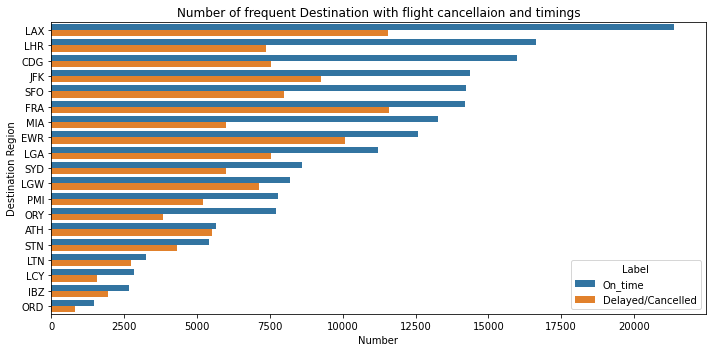

In [374]:
parties_of_interest = ['LAX','FRA','LHR','JFK','CDG','SFO','EWR','MIA','LGA','LGW','SYD','PMI','ORY','ATH','STN','LTN','IBZ','LCY','ORD']

plt.figure(figsize=(10, 5))
sns.barplot(data=group_and_count(df.loc[df.flight_destination_code_iata.isin(parties_of_interest), :], ['flight_destination_code_iata', 'Label']), y='flight_destination_code_iata', x='count', hue='Label', hue_order=truhometer_labels)
plt.xlabel('Number')
plt.ylabel('Destination Region')
plt.title('Number of frequent Destination with flight cancellaion and timings')
plt.tight_layout()
plt.savefig('nb_rulings_for_major_parties.png')

Among the most busiest Airport, ATH,LTN, LGW,LGA and FRA suffer most cancellation.

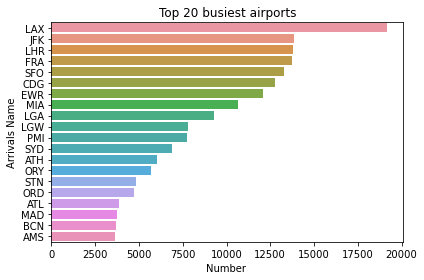

In [375]:
sns.barplot(data=group_and_count(df, 'flight_origin_code_iata')[:20], y='flight_origin_code_iata', x='count')
plt.xlabel('Number ')
plt.ylabel('Arrivals Name')
plt.title('Top 20 busiest airports')
plt.tight_layout()

In [376]:
LAX is the most busiest airport

SyntaxError: invalid syntax (<ipython-input-376-526c704aebad>, line 1)

In [ ]:
parties_of_interest = ['LAX','FJK','LHR','FRA','SFO','CDG','EWR','MIA','LGA','LGW','PMI','SYD','ATH','ORY','STN','ORD','ATL','MAD','BCN','AMS']

plt.figure(figsize=(10, 5))
sns.barplot(data=group_and_count(df.loc[df.flight_origin_code_iata.isin(parties_of_interest), :], ['flight_origin_code_iata', 'Label']), y='flight_origin_code_iata', x='count', hue='Label', hue_order=truhometer_labels)
plt.xlabel('Number')
plt.ylabel('Arrivals Region')
plt.title('Number of frequent Destination with flight cancellaion and timingss')
plt.tight_layout()


FRA location has major cancellation, more than on time flights

#### Flight by date Visual

Text(0.5, 1.0, 'Top 20 busiest airports')

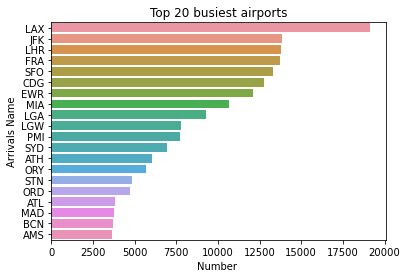

In [377]:
sns.barplot(data=group_and_count(df, 'flight_origin_code_iata')[:20], y='flight_origin_code_iata', x='count')
plt.xlabel('Number ')
plt.ylabel('Arrivals Name')
plt.title('Top 20 busiest airports')
#plt.tight_layout()

In [378]:
#Average arrival delay at particular airport 
means = df.groupby(['flight_origin_code_iata'])['ARRIVAL_DELAY'].mean()
means.sort_values(ascending=False)[:10]

flight_origin_code_iata
YOD    13594.000000
MST     9095.428571
TVC     7437.000000
GMU     6812.000000
KSF     6663.375000
XPL     5589.000000
YDT     5465.000000
ACY     5443.000000
COO     4981.200000
WJF     4962.000000
Name: ARRIVAL_DELAY, dtype: float64

In [379]:
#Average Destination delay at particular airport 
means = df.groupby(['flight_origin_code_iata'])['DEPARTURE_DELAY'].mean()
means.sort_values(ascending=False)[:10]

flight_origin_code_iata
CRK    21897.000000
RUT    19046.000000
YOD    14233.000000
SBY    11314.000000
MST     9493.428571
TVC     9325.000000
PNE     9300.000000
GMU     8793.000000
MZJ     8234.000000
GUF     8100.000000
Name: DEPARTURE_DELAY, dtype: float64

In [380]:
#Delay at Airport due to some causes
means = df.groupby(['flight_origin_code_iata'])['DELAY'].mean()
means.sort_values(ascending=False)[:10]

flight_origin_code_iata
CRK    21897.00
RUT    19046.00
SBY    11314.00
PNE     9300.00
GUF     8100.00
MZJ     7891.00
MKT     7869.00
ICT     7411.00
LDJ     7120.00
WDH     6415.35
Name: DELAY, dtype: float64

In [381]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}


#Creation of a dataframe with statitical infos on each airline:
global_stats = df['DELAY'].groupby(df['airline_name']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
airline_name,,,,
Air Corsica,0.0,19200.0,510.0,740.223529
Loganair,-1197.0,5491.0,513.0,649.339181
Pegasus Airlines,-1044.0,2917.0,515.0,1199.549515
All Nippon Airways,-2104.0,4071.0,527.0,1241.683112
Copa Airlines,-1997.0,4493.0,538.0,853.907063
Air India,-10358.0,75420.0,538.0,1607.700743
Atlas Air,-64411.0,36200.0,547.0,1771.983547
Air New Zealand,-19015.0,7615.0,549.0,1247.284153
ASL Airlines France,-3530.0,2559.0,549.0,260.692168


In [382]:
df=df[['status', 'aircraft_model_code','airline_name', 'flight_origin_code_iata','flight_destination_code_iata', 'flight_departure_scheduled','flight_departure_real','flight_duaration','ARRIVAL_DELAY','DEPARTURE_DELAY','DELAY','Label']]


In [383]:
from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
df["status"] = lbl_enc.fit_transform(df.status.values)
df["airline_name"] = lbl_enc.fit_transform(df.airline_name.values)
df["flight_origin_code_iata"] = lbl_enc.fit_transform(df.flight_origin_code_iata.values)
df["flight_destination_code_iata"] = lbl_enc.fit_transform(df.flight_destination_code_iata.values)
df["Label"] = lbl_enc.fit_transform(df.Label.values)
df["aircraft_model_code"] = lbl_enc.fit_transform(df.aircraft_model_code.values)

y=df["Label"]
df.drop('Label', axis = 1, inplace = True)
df.drop('DELAY', axis = 1, inplace = True)
df.drop('ARRIVAL_DELAY', axis = 1, inplace = True)
df.drop('DEPARTURE_DELAY', axis = 1, inplace = True)
   
df.drop('flight_duaration', axis = 1, inplace = True)


C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [384]:
## train test split
from sklearn.model_selection import train_test_split
steps = 25000
X_train,X_test,Y_train,Y_test = train_test_split(df, y, test_size=0.1,shuffle = False)

In [385]:
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
model1 = LinearSVC(random_state=0, tol=1e-5)
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,0.5,1,10]}
clf = GridSearchCV(model1, parameters, cv=5)
model1.fit(X_train,Y_train)

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [318]:
pred1 = model1.predict(X_test)
score = metrics.accuracy_score(Y_test, pred1)
score

0.7240137502046161

In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model1 = LogisticRegression()
parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(model1, parameters, cv=10)
model1.fit(X_train,Y_train)
pred1 = model1.predict(X_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy:   0.692


In [387]:
i=0
for prediction, label in zip(pred1, Y_test):
    i=i+1
    if (prediction != label):
        aircraft_model_code=int(X_train.iloc[i,1])
        print(aircraft_model_code)
        #print(lbl_enc.inverse_transform([aircraft_model_code]))

90
141
138
136
80
88
86
88
88
88
87
87
81
87
87
95
81
88
86
94
210
80
86
87
87
138
86
128
87
141
80
141
138
87
142
80
142
141
97
86
129
87
86
138
87
80
86
87
86
86
86
81
138
86
95
238
86
86
87
94
87
129
87
95
87
86
80
129
87
95
143
86
131
142
88
88
87
87
141
210
87
80
86
131
87
86
88
11
80
210
87
86
87
87
138
86
87
97
96
87
138
86
88
87
86
141
143
86
96
142
87
86
80
86
87
81
80
87
86
87
88
88
80
87
81
87
87
87
86
86
138
87
80
89
87
87
88
88
210
80
210
80
87
87
87
138
210
86
80
87
7
86
141
88
87
141
210
138
86
87
87
138
87
86
87
86
87
141
141
97
87
143
216
86
86
86
87
216
87
86
87
87
80
129
141
216
80
81
86
87
89
80
90
86
129
86
88
143
146
87
133
87
87
86
141
97
88
87
87
87
141
86
87
80
131
87
87
142
87
210
143
143
87
88
143
87
86
96
87
88
86
210
89
88
88
142
141
142
143
80
131
87
87
87
87
87
143
86
88
141
86
87
88
87
90
138
129
90
210
88
81
89
87
131
143
87
87
87
88
87
138
81
136
87
86
129
87
136
87
86
87
138
128
86
97
138
97
97
143
131
141
131
131
143
138
143
97
27
143
141
97
87
81
87

138
87
11
87
86
86
88
86
88
88
87
87
86
143
80
128
80
81
87
141
87
143
94
88
80
216
80
88
80
143
141
87
86
87
128
142
141
87
87
87
97
141
87
81
80
86
86
210
87
141
87
87
143
210
86
87
87
87
90
87
97
97
86
138
86
97
97
87
129
86
131
81
80
80
87
80
86
87
138
72
87
87
87
81
88
80
88
146
88
88
86
87
88
88
141
96
86
89
88
87
138
86
87
86
138
95
142
87
138
81
86
143
128
87
143
81
210
86
97
87
87
143
143
86
142
210
86
97
80
80
11
87
141
87
88
87
90
87
89
86
80
87
138
86
97
88
143
141
88
86
138
96
86
138
85
87
86
97
87
87
87
129
86
87
210
87
143
131
141
138
136
87
88
86
87
87
81
81
87
142
87
80
142
141
142
87
87
142
87
88
88
138
138
86
97
87
86
87
138
80
87
86
86
87
80
97
87
143
131
87
138
136
210
88
87
141
86
88
141
88
87
86
143
141
143
138
89
138
90
86
138
86
88
80
138
142
136
92
138
143
80
142
131
141
86
86
80
142
88
129
94
88
90
95
87
97
129
90
143
80
87
86
136
87
146
87
80
87
80
86
88
87
90
80
128
131
90
89
131
143
141
97
138
89
138
131
141
142
141
138
138
131
131
131
88
87
81
81
81
80
87

15
86
88
87
88
88
86
7
86
129
87
87
86
87
86
86
86
129
88
86
87
41
87
138
86
143
129
138
113
86
138
138
129
86
87
129
87
86
142
143
138
80
129
87
87
87
86
87
129
87
86
86
86
86
87
86
129
131
87
129
113
80
86
80
124
87
86
129
87
87
80
87
86
87
87
86
87
81
87
86
86
87
80
86
87
86
129
87
87
80
86
87
80
89
86
86
87
130
217
129
129
86
138
86
138
138
88
129
87
146
143
138
129
138
86
87
86
142
87
87
87
86
86
87
86
87
129
129
11
80
87
86
87
87
129
86
86
86
87
129
87
86
129
86
87
87
87
87
41
86
129
88
86
87
129
81
129
87
87
143
86
87
88
129
88
86
87
86
87
86
86
129
130
217
89
129
86
113
129
88
129
146
128
86
86
87
129
86
138
87
142
143
88
138
129
87
143
86
87
87
81
129
87
86
86
87
87
87
88
88
86
86
81
87
86
86
86
86
86
129
87
87
87
87
129
129
87
87
129
86
86
87
129
87
87
86
86
129
86
86
86
129
146
88
87
87
87
80
81
142
80
87
87
87
129
129
87
86
129
86
86
87
86
143
87
86
86
87
86
86
86
143
86
87
80
87
86
86
143
138
84
138
129
129
87
87
87
86
86
86
138
89
87
11
142
143
138
88
88
86
133
81
129
87


86
211
288
87
129
129
140
86
129
129
51
129
129
129
129
129
129
87
129
129
129
129
129
129
129
129
129
129
129
87
129
129
129
129
129
129
129
86
129
88
129
23
129
87
129
87
129
129
51
129
129
129
129
129
129
129
129
129
129
129
129
129
129
132
129
129
129
129
129
129
129
129
129
129
86
129
129
129
129
129
129
41
129
129
86
86
129
211
129
129
129
129
129
129
129
129
129
129
87
129
87
88
129
141
129
129
129
129
129
129
129
129
129
129
129
86
129
129
87
129
129
129
129
129
129
129
129
88
129
129
129
70
129
87
129
129
129
129
129
129
86
140
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
88
129
129
86
129
129
129
129
129
86
129
129
129
129
129
129
129
129
129
129
129
129
129
129
80
129
88
129
129
88
129
129
88
129
88
129
129
129
129
86
129
129
129
129
129
129
129
129
129
129
129
129
87
129
129
73
129
129
129
86
129
129
129
129
129
129
129
129
129
129
129
88
216
129
129
129
129
129
87
53
129
129
216
129
129
129
129
129
129
129
87
129
216
11
86
129
129
129
129
213
129
129
129

85
87
214
85
214
86
88
87
85
216
85
86
216
138
210
85
129
216
129
217
88
141
87
86
87
88
86
87
87
88
141
87
85
129
86
87
128
88
87
87
97
80
129
87
86
88
133
87
129
86
87
80
140
210
80
216
86
86
88
133
195
129
285
86
225
129
133
138
88
143
214
87
226
214
87
87
91
141
216
85
138
217
87
86
86
88
80
87
87
213
86
88
143
87
87
86
88
87
86
87
129
216
87
87
285
85
141
88
285
88
97
87
87
129
85
88
216
87
88
138
146
86
86
87
87
129
87
143
86
214
87
87
138
86
87
136
138
89
143
143
89
130
143
87
226
129
88
88
214
87
85
86
231
129
101
32
33
33
87
156
88
87
87
81
129
129
87
87
87
87
87
86
224
140
87
85
87
87
87
86
87
87
86
85
216
129
87
87
87
214
46
86
130
285
214
86
87
86
87
80
140
129
142
87
97
129
86
85
214
85
130
214
87
86
216
86
88
85
141
210
86
129
88
86
88
86
87
95
87
141
143
129
129
87
35
87
86
128
129
87
87
141
216
87
86
35
140
87
129
87
87
86
86
87
143
87
80
88
210
128
143
87
87
214
129
138
87
86
129
87
138
88
143
87
124
138
87
216
141
138
217
86
88
85
87
87
87
87
86
86
124
88
87
86
86
285

In [388]:
import lightgbm as lgb
dtrain = lgb.Dataset(X_train, Y_train)
dval = lgb.Dataset(X_test, Y_test)


In [389]:
params = { 
    'num_leaves' : 256,
    'learning_rate':0.03,
    'metric':'auc',
    'objective':'binary',
    'early_stopping_round': 40,
    'max_depth':10,
    'bagging_fraction':0.5,
    'feature_fraction':0.6,
    'bagging_seed':2017,
    'feature_fraction_seed':2017,
    'verbose' : 1
}

In [390]:
model = lgb.train(params, dtrain,num_boost_round=500,valid_sets=dval,verbose_eval=20)

C:\Users\vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 40 rounds
[20]	valid_0's auc: 0.743476
[40]	valid_0's auc: 0.754143
[60]	valid_0's auc: 0.761604
[80]	valid_0's auc: 0.766536
[100]	valid_0's auc: 0.771555
[120]	valid_0's auc: 0.77723
[140]	valid_0's auc: 0.780918
[160]	valid_0's auc: 0.783923
[180]	valid_0's auc: 0.78709
[200]	valid_0's auc: 0.789725
[220]	valid_0's auc: 0.793182
[240]	valid_0's auc: 0.795609
[260]	valid_0's auc: 0.798255
[280]	valid_0's auc: 0.800214
[300]	valid_0's auc: 0.802492
[320]	valid_0's auc: 0.805597
[340]	valid_0's auc: 0.807686
[360]	valid_0's auc: 0.810316
[380]	valid_0's auc: 0.813271
[400]	valid_0's auc: 0.816909
[420]	valid_0's auc: 0.818813
[440]	valid_0's auc: 0.821859
[460]	valid_0's auc: 0.823953
[480]	valid_0's auc: 0.825976
[500]	valid_0's auc: 0.828779
Did not meet early stopping. Best iteration is:
[500]	valid_0's auc: 0.828779


In [391]:
pred1 = model.predict(X_test)

In [332]:
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)

accuracy:   0.724


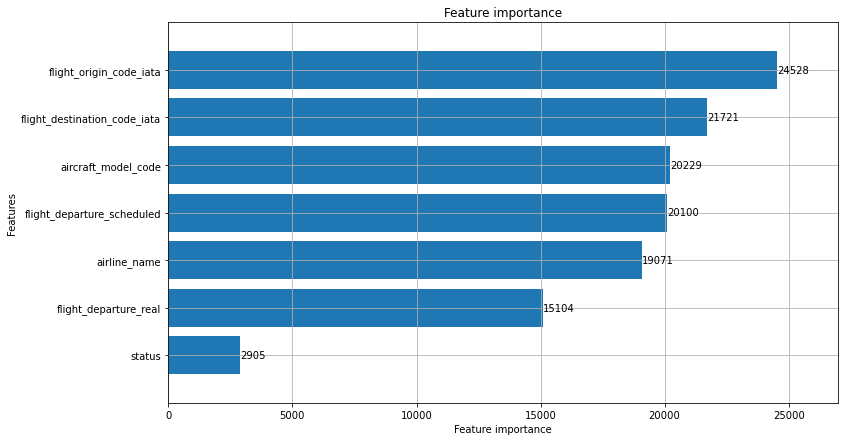

In [392]:
### Plot the important variables ###
fig, ax = plt.subplots(figsize=(12,7))
lgb.plot_importance(model, max_num_features=10, height=0.8, ax=ax)
plt.show()